Prathamesh Ingale

# Practical 3 Implementation of Linear and Logistic Regression

## Aim:
To implement Linear and Logistic Regression using scikit-learn library in Python.

## Theory:
#### Regression:
Regression is a statistical modeling technique used to establish a relationship between a dependent variable and one or more independent variables. It aims to predict the value of the dependent variable based on the values of the independent variables. Regression analysis is widely employed in various fields, including finance, economics, social sciences, and machine learning.

#### Linear Regression: 

Linear regression is a specific type of regression analysis that assumes a linear relationship between the independent variables and the dependent variable. It seeks to find the best-fit line that minimizes the difference between the predicted values and the actual values of the dependent variable. The equation of a linear regression model can be represented as:

```y = β0 + β1x1 + β2x2 + ... + βnxn + ε```

Here, y is the dependent variable, x1, x2, ..., xn are the independent variables, β0 is the intercept term, β1, β2, ..., βn are the coefficients, and ε is the error term. The coefficients represent the relationship between the independent variables and the dependent variable. Linear regression can be used for both prediction and inference purposes.

#### Logistic Regression:

Logistic regression, on the other hand, is a regression technique used when the dependent variable is binary or categorical. It is used to model the probability of an event occurring, given a set of independent variables. The dependent variable in logistic regression follows a logistic or sigmoidal function, which restricts its values between 0 and 1. The equation of a logistic regression model can be represented as:

```p = 1 / (1 + exp(-z))
where z = β0 + β1x1 + β2x2 + ... + βnxn

```
Here, p represents the probability of the event occurring, z is the linear combination of the independent variables and their coefficients, and exp() denotes the exponential function. Logistic regression is commonly used for binary classification problems, such as predicting whether an email is spam or not, or whether a customer will churn or not.

#### Scikit-learn:

Scikit-learn (sklearn) is a popular machine learning library in Python that provides various tools and functions for regression analysis, including linear regression and logistic regression.

For linear regression, sklearn provides the `LinearRegression` class, which can be used to fit a linear regression model and make predictions. It offers methods to access the model coefficients, intercept, and perform operations like predicting new values or evaluating the model's performance using metrics such as mean squared error (MSE) or R-squared.

For logistic regression, sklearn provides the `LogisticRegression` class. It allows fitting logistic regression models with different optimization algorithms, regularization techniques, and hyperparameters. The class provides methods for fitting the model, predicting probabilities or classes, accessing coefficients, and evaluating the model's performance using metrics like accuracy, precision, recall, or area under the receiver operating characteristic curve (AUC-ROC).

Sklearn also offers various utilities to preprocess data, such as scaling features using `StandardScaler` or `MinMaxScaler`, handling categorical variables with `OneHotEncoder` or `LabelEncoder`, and performing feature selection or dimensionality reduction.

In addition to these basic tools, sklearn provides additional functionalities like regularization techniques such as Ridge Regression (`Ridge`), Lasso Regression (`Lasso`), and Elastic Net Regression (`ElasticNet`), which can help mitigate overfitting and improve model performance.

Furthermore, sklearn provides cross-validation techniques (`cross_val_score`, `KFold`, etc.) to assess model generalization, hyperparameter tuning tools (`GridSearchCV`, `RandomizedSearchCV`) to optimize model performance, and model evaluation metrics (`confusion_matrix`, `classification_report`) to assess classification models' performance.

In summary, regression is a statistical modeling technique to establish relationships between variables. Linear regression assumes a linear relationship, while logistic regression is used for binary or categorical outcomes. Sklearn provides user-friendly tools and functions to perform linear and logistic regression, along with additional utilities for data preprocessing, feature selection, model evaluation, and optimization.



## Code:



### Linear Regression:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# df_regression = pd.read_csv("./Stores.csv")
df_regression = pd.DataFrame({'x':np.arange(100),'y':np.arange(100)**3})

In [4]:
df_regression.head()

,x,y
0,0,0
1,1,1
2,2,8
3,3,27
4,4,64


In [5]:
df_regression.shape

(100, 2)

In [6]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       100 non-null    int32
 1   y       100 non-null    int32
dtypes: int32(2)
memory usage: 932.0 bytes


In [7]:
df_regression.columns

Index(['x', 'y'], dtype='object')

In [8]:
df_regression.describe()

,x,y
count,100.000000,100.000000
mean,49.500000,245025.000000
std,29.011492,280457.581671
min,0.000000,0.000000
25%,24.750000,15174.750000
50%,49.500000,121324.500000
75%,74.250000,409386.750000
max,99.000000,970299.000000


In [9]:
df_regression.isna().sum()

x    0
y    0
dtype: int64

In [10]:
df_regression.corr()

,x,y
x,1.000000,0.915516
y,0.915516,1.000000


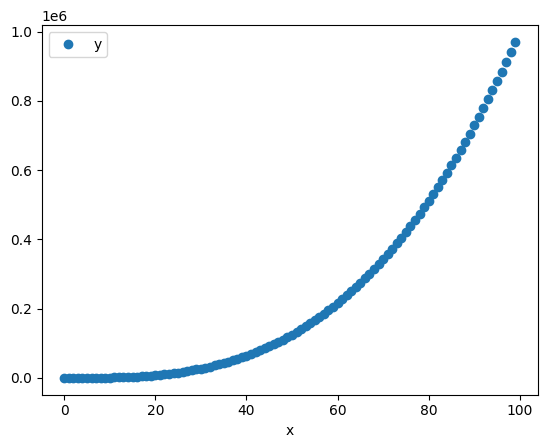

In [11]:
df_regression.plot(x='x',y='y',style='o')
plt.show()

In [12]:
df_regression

,x,y
0,0,0
1,1,1
2,2,8
3,3,27
4,4,64
...,...,...
95,95,857375
96,96,884736
97,97,912673
98,98,941192


In [13]:
df_regression.iloc[:,1].values

array([     0,      1,      8,     27,     64,    125,    216,    343,
          512,    729,   1000,   1331,   1728,   2197,   2744,   3375,
         4096,   4913,   5832,   6859,   8000,   9261,  10648,  12167,
        13824,  15625,  17576,  19683,  21952,  24389,  27000,  29791,
        32768,  35937,  39304,  42875,  46656,  50653,  54872,  59319,
        64000,  68921,  74088,  79507,  85184,  91125,  97336, 103823,
       110592, 117649, 125000, 132651, 140608, 148877, 157464, 166375,
       175616, 185193, 195112, 205379, 216000, 226981, 238328, 250047,
       262144, 274625, 287496, 300763, 314432, 328509, 343000, 357911,
       373248, 389017, 405224, 421875, 438976, 456533, 474552, 493039,
       512000, 531441, 551368, 571787, 592704, 614125, 636056, 658503,
       681472, 704969, 729000, 753571, 778688, 804357, 830584, 857375,
       884736, 912673, 941192, 970299])

In [14]:
# x_regression = df_regression.iloc[:,:-1].values
# y_regression = df_regression.iloc[:,-2].values

x_regression = df_regression[['x']]
y_regression = df_regression[['y']]

# Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_regression,y_regression, 
                                                    test_size=0.2, random_state=33)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [15]:
line = regressor.coef_*x_regression+regressor.intercept_

In [16]:
x_regression.shape

(100, 1)

In [17]:
y_regression.shape

(100, 1)

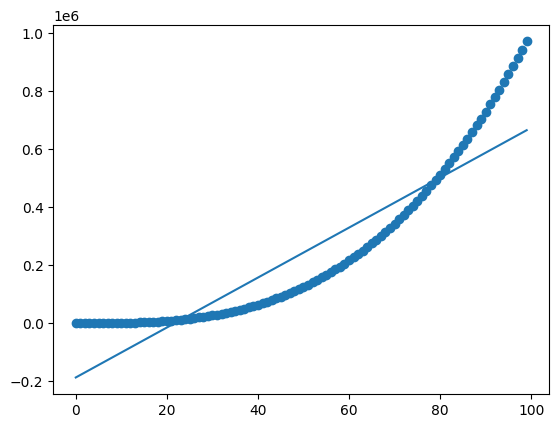

In [18]:
plt.scatter(x_regression, y_regression)
plt.plot(x_regression,line)
plt.show()

In [19]:
print(x_test)
y_pred = regressor.predict(x_test)

     x
56  56
90  90
95  95
82  82
60  60
71  71
6    6
81  81
2    2
70  70
96  96
62  62
59  59
86  86
41  41
39  39
4    4
34  34
99  99
72  72


In [20]:
y_test_squeeze = np.squeeze(y_test)
y_pred_squeeze = np.squeeze(y_pred)
df = pd.DataFrame({'Actual':y_test_squeeze, 'Predicted':y_pred_squeeze})
df

,Actual,Predicted
56,175616,294847.693333
90,729000,587335.791108
95,857375,630348.746663
82,551368,518515.062220
60,216000,329258.057777
71,357911,423886.559998
6,216,-135281.862219
81,531441,509912.471109
2,8,-169692.226663
70,343000,415283.968887


In [21]:
regressor.score(x_train, y_train)

0.8407211891778915

In [22]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  121056.8742224955


In [23]:
print('r2 Score :', metrics.r2_score(y_test, y_pred))

r2 Score : 0.7977640430267173


In [24]:
x_axis = range(len(y_test))
x_axis

range(0, 20)

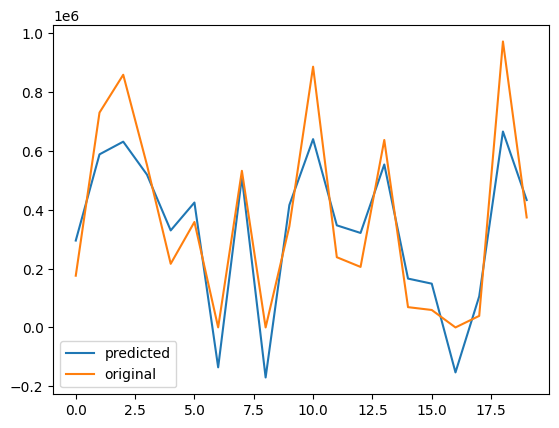

In [25]:

plt.plot(x_axis, y_pred, label='predicted')
plt.plot(x_axis,y_test, label='original')
plt.legend()
plt.show()

### Logistic Regression

In [26]:
df=pd.read_csv('./Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


**Asumption**


Here when we see this dataset, we see that we do not have a binary value to predict. So we will create a new column which will have a binary value.
To create a logistic value of True and False, we create a new column on our dataset. Let us consider that if the ratio of `Store_Sales` and `Daily_Customer_Count` is greater than 100, then we will consider it as True, else False. 

In [31]:
df["Profitable"] = df["Store_Sales"]/df['Daily_Customer_Count']>100
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Profitable
0,1,1659,1961,530,66490,True
1,2,1461,1752,210,39820,True
2,3,1340,1609,720,54010,False
3,4,1451,1748,620,53730,False
4,5,1770,2111,450,46620,True
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,False
892,893,1387,1663,850,82080,False
893,894,1200,1436,1060,76440,False
894,895,1299,1560,770,96610,True


In [32]:
x=df[['Store_Area','Store_Sales','Daily_Customer_Count']].values
y = df[['Profitable']].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0)
lm.fit(x_train,y_train)

c:\Users\paxyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [35]:
y_pred=lm.predict(x_test)
print(x_test)
print(y_pred)

[[ 8.01122365e-04 -4.36135143e-01  7.65220970e-01]
 [ 9.65850926e-01  7.64211777e-01 -1.75969071e+00]
 [ 7.86399517e-01  4.27565500e-01 -5.15015939e-01]
 [-8.44614408e-01 -2.60105721e+00  6.94096697e-01]
 [ 1.28487566e+00  3.29078557e-01  5.51848152e-01]
 [ 1.54807106e+00  1.58195185e+00  1.12084233e+00]
 [ 3.75655178e-01  8.07187898e-01 -1.23832439e-01]
 [ 7.02655525e-01  7.42723717e-01  9.07469516e-01]
 [ 2.91911187e-01  4.73462121e-02 -9.06199439e-01]
 [ 1.48426611e+00  2.14661032e+00  1.25102515e-01]
 [ 6.26887152e-01 -7.70990749e-01  1.72539865e+00]
 [-8.69306780e-02  4.50844232e-01 -7.63950894e-01]
 [-5.61479962e-01  6.20361152e-01 -8.82703028e-02]
 [-3.70065125e-01 -1.11957484e+00 -8.82703028e-02]
 [-8.56577836e-01  4.32937515e-01 -1.65300430e+00]
 [-3.50126079e-01  2.12930049e+00  1.01415592e+00]
 [-5.17614062e-01  1.89406166e-01 -5.86140212e-01]
 [-4.70525869e-02 -1.19000792e+00  4.80723879e-01]
 [-1.47468825e+00  1.07638554e+00 -6.92826621e-01]
 [-1.84156669e+00 -3.56748698e-

In [36]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score
print(accuracy_score(y_test,y_pred))
df_cm = cm(y_test,y_pred)
df_cm

0.9866071428571429


array([[164,   3],
       [  0,  57]], dtype=int64)

<Axes: >

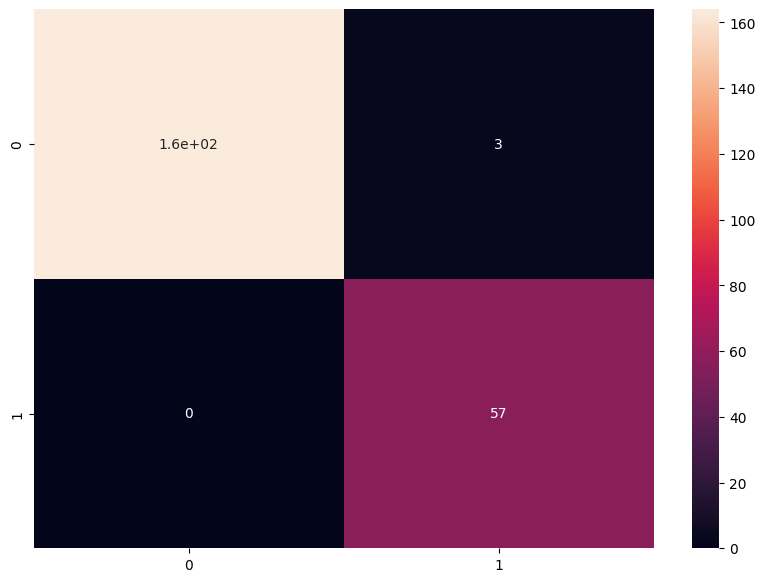

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True)

## Conclusion
We have successfully implemented Linear and Logistic Regression on our dataset.